In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error 

In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
print(train_data.head())


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [3]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
print(train_data.isnull().sum())


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [5]:
train_data['Item_Weight'] = train_data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
test_data['Item_Weight'] = test_data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [6]:
outlet_size_mode = train_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_size = train_data['Outlet_Size'].isnull()
train_data.loc[missing_size, 'Outlet_Size'] = train_data.loc[missing_size, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
missing_size_test = test_data['Outlet_Size'].isnull()
test_data.loc[missing_size_test, 'Outlet_Size'] = test_data.loc[missing_size_test, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)
print("\n--- Missing Values After Cleaning ---")
print(train_data.isnull().sum())




--- Missing Values After Cleaning ---
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


C:\Users\naqsh\AppData\Local\Temp\ipykernel_3632\3179092628.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
C:\Users\naqsh\AppData\Local\Temp\ipykernel_3632\3179092628.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [7]:
print(train_data.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


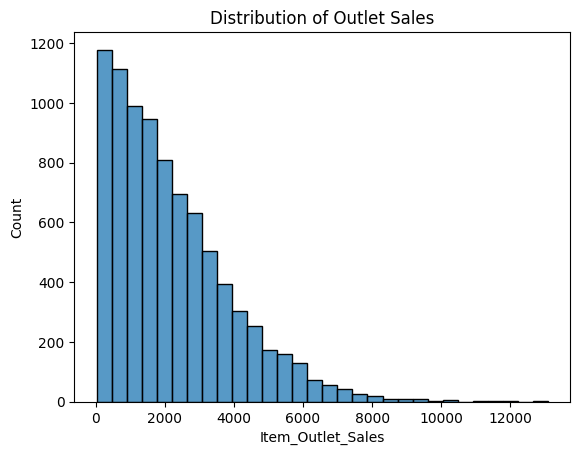

In [8]:
sns.histplot(train_data['Item_Outlet_Sales'], bins=30)
plt.title('Distribution of Outlet Sales')
plt.show()

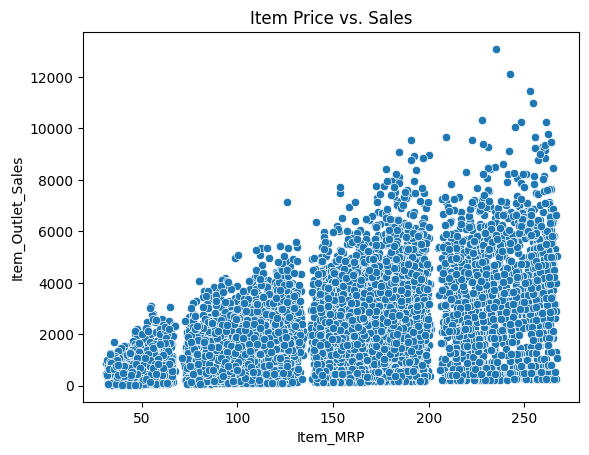

In [9]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=train_data)
plt.title('Item Price vs. Sales')
plt.show()

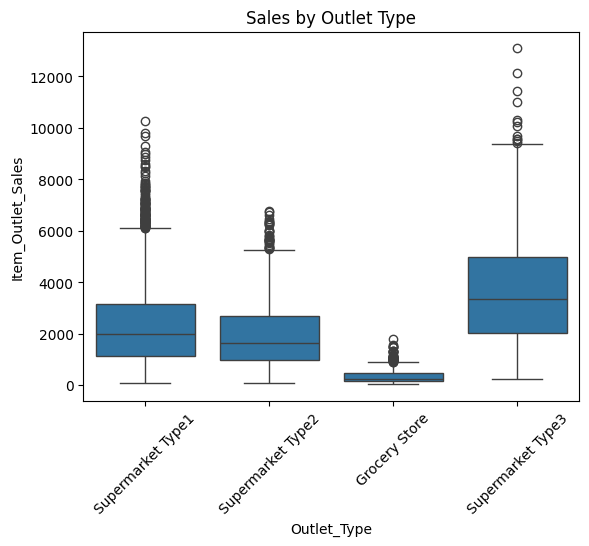

In [10]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data)
plt.xticks(rotation=45)
plt.title('Sales by Outlet Type')
plt.show()

In [11]:
print("Original Fat Content values:")
print(train_data['Item_Fat_Content'].value_counts())
print("\n")

Original Fat Content values:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64




In [12]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('LF', 'Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('reg', 'Regular')

In [13]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('LF', 'Low Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('reg', 'Regular')

In [14]:
print("Cleaned Fat Content values:")
print(train_data['Item_Fat_Content'].value_counts())
print("\n")

Cleaned Fat Content values:
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64




In [15]:
item_avg_visibility = train_data.pivot_table(values='Item_Visibility', index='Item_Identifier')
train_data.loc[train_data['Item_Visibility'] == 0, 'Item_Visibility'] = train_data.loc[train_data['Item_Visibility'] == 0, 'Item_Identifier'].apply(lambda x: item_avg_visibility.loc[x])
test_data.loc[test_data['Item_Visibility'] == 0, 'Item_Visibility'] = test_data.loc[test_data['Item_Visibility'] == 0, 'Item_Identifier'].apply(lambda x: item_avg_visibility.loc[x])



In [16]:
train_data_processed = train_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
test_data_processed = test_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)


In [17]:
train_data_processed = pd.get_dummies(train_data_processed, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)
test_data_processed = pd.get_dummies(test_data_processed, columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)


In [18]:
print(train_data_processed.head())


   Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.015274  182.0950                       1998   
4         8.93         0.008082   53.8614                       1987   

   Item_Outlet_Sales  Item_Fat_Content_Regular  Item_Type_Breads  \
0          3735.1380                     False             False   
1           443.4228                      True             False   
2          2097.2700                     False             False   
3           732.3800                      True             False   
4           994.7052                     False             False   

   Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  ...  \
0                False             False             True  ...   
1                False    

In [19]:
X = train_data_processed.drop('Item_Outlet_Sales', axis=1)
y = train_data_processed['Item_Outlet_Sales']

In [20]:

missing_cols = set(X.columns) - set(test_data_processed.columns)
for c in missing_cols:
    test_data_processed[c] = 0
test_data_processed = test_data_processed[X.columns] 


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [25]:
lr_r2 = r2_score(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print(f"--- Linear Regression Results ---")
print(f"R-squared (R^2): {lr_r2:.2f}") 
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.2f}") 

--- Linear Regression Results ---
R-squared (R^2): 0.58
Root Mean Squared Error (RMSE): 1069.93


In [26]:
rf_r2 = r2_score(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"--- Random Forest Results ---")
print(f"R-squared (R^2): {rf_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print("\n")

print("The Random Forest model seems to be better because it has a higher R-squared and a lower RMSE.")

--- Random Forest Results ---
R-squared (R^2): 0.56
Root Mean Squared Error (RMSE): 1090.13


The Random Forest model seems to be better because it has a higher R-squared and a lower RMSE.


In [29]:
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


train_orig = pd.read_csv('Train.csv')

imputation_values = {
    'Item_Weight': train_orig['Item_Weight'].mean(),
    'Outlet_Size': train_orig['Outlet_Size'].mode()[0],
    'Item_Visibility': train_orig[train_orig['Item_Visibility'] != 0]['Item_Visibility'].mean()
}
joblib.dump(imputation_values, 'imputation_values.pkl')


le_fat = LabelEncoder()
le_size = LabelEncoder()
le_loc = LabelEncoder()
le_type = LabelEncoder()

train_orig['Item_Fat_Content'] = train_orig['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
train_orig['Outlet_Size'] = train_orig['Outlet_Size'].fillna(imputation_values['Outlet_Size'])

le_fat.fit(train_orig['Item_Fat_Content'])
le_size.fit(train_orig['Outlet_Size'])
le_loc.fit(train_orig['Outlet_Location_Type'])
le_type.fit(train_orig['Outlet_Type'])

joblib.dump(le_fat, 'le_fat.pkl')
joblib.dump(le_size, 'le_size.pkl')
joblib.dump(le_loc, 'le_loc.pkl')
joblib.dump(le_type, 'le_type.pkl')


def get_item_category(item_type):
    if item_type in ['Dairy', 'Meat', 'Breads', 'Baking Goods', 'Breakfast', 'Fruits and Vegetables', 'Seafood', 'Starchy Foods', 'Soft Drinks']:
        return 'Food'
    elif item_type == 'Health and Hygiene' or item_type == 'Household' or item_type == 'Others':
        return 'Non-Consumable'
    else:
        return 'Drink'

train_orig['Item_Category'] = train_orig['Item_Type'].apply(get_item_category)
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(train_orig[['Item_Category']])

joblib.dump(ohe, 'ohe.pkl')


joblib.dump(rf_model, 'model.pkl')

X_columns = X.columns
joblib.dump(X_columns, 'model_columns.pkl')

print("✅ All files saved successfully!")
print("You should now have 8 .pkl files in your folder.")

✅ All files saved successfully!
You should now have 8 .pkl files in your folder.
